<img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/cover-homework11.png" style="width: 100%;">

## Overview
<hr />

This notebook contains exercise 11 (optional exercise 02). This exercise was proposed by Professor Valdivino Santiago Júnior in the course CAP421 - Deep Learning offered in the Postgraduate Program in Applied Computing at the National Institute for Space Research.

**Exercise optional 02:**
> Explain why the "new" proposed DenseNet-83 has more trainable parameters and demands more memory (parameters) than the DenseNet-121. Create a simple network with some dense blocks (enventually transition layers), calculate the number os trainable parameters and related memory to solve this exercise.

## Table of content <span id="table_of_content"></span>
<hr />

* [1. DenseNet](#densenet)
    * [1.1. Camada de entrada](#input_layer)
    * [1.2. Blocos densos](#dense_blocks)
    * [1.3. Camadas de transição](#transition_layers)
    * [1.4. Camada de saída](#output_layer)
* [2. Configurando experimentos](#experiments)
    * [2.1. Importação das bibliotecas e configurações](#import_libraries)
    * [2.2. Carregando dados](#load_data)
    * [2.3. Implementando a DenseNet](#densenet_implementation)
    * [2.4. Criando e compilando modelos](#create_models)
    * [2.5. Treinando e salvando DenseNet-121](#training_densenet121)
    * [2.6. Treinando e salvando DenseNet-83](#training_densenet83)
    * [2.7. Comparação e avaliação dos modelos](#evaluate_models)
* [3. Referências](#references)

**Author:** Adriano P. Almeida <<adriano.almeida@inpe.br>>
<br />
**Full Notebook avaiable at**: [GitHub](https://github.com/AdrianoPereira/CAP421/blob/main/lectures/homework11/DENSENET84_AND_DENSENET121.ipynb) and [Google Colab](https://colab.research.google.com/github/AdrianoPereira/CAP421/blob/main/lectures/homework11/DENSENET84_AND_DENSENET121.ipynb)
<br />
**Created on:** 12 November, 2021
<br />

<a href="https://colab.research.google.com/github/AdrianoPereira/CAP421/blob/main/lectures/homework11/DENSENET84_AND_DENSENET121.ipynb">
    <img style="float: left; margin-right: 10px;" src="https://colab.research.google.com/assets/colab-badge.svg" />
</a>

<a href="https://github.com/AdrianoPereira/CAP421/tree/main/lectures/homework11">
    <img style="float: left; margin-right: 10px;" src="https://img.shields.io/badge/GitHub-Open%20Repository-lightgrey?logo=github" />
</a>
<br /><br />

### 1. DenseNet <a id="densenet" href="#table_of_content">^</a>
<hr />

A DenseNet é um arquitetura de rede neural convolucional em que as camadas ocultas possuem conexões com as camadas subsequentes, com um certo grau de persistência [(HUANG, 2017)](#huang_densely_2017). Essa característica é semelhante a que esta presente na arquitetura ResNet [(HE, 2016)](#he_deep_2016), porém, existem diferenças em como essas conexões são feitas. A ResNet realiza uma operação de soma com as informações disponíveis nas camadas, que pode ser descrita como $a^{l} = g(a^{[l+1]}+a^{[1]})$, em que $g$ é uma função da taxa de alcance da rede neural. Já a DenseNet realiza uma concatenação das conxeções, descrita como $a^{l} = g(a^{[0]}, a^{[1]}, ..., a^{[l-1]})$. Essas conexões permitem que a rede não tenha o problema do desaparecimento de gradiente, uma vez que as informações são transferidas para mais de uma camada, como pode ser observado na Figura [1](#densenet). Cada camada possui uma conexão com as camadas subsequentes.

<p>
<img width="60%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/densenet.png" />
<br />
<span style="display: block; text-align: center;" id="densenet">
<strong>Figura 1</strong>: Esquema de um bloco da arquitetura DenseNet. <strong>Fonte</strong>: <a href=""#huand_densely_2017">Huang (2017)</a>
</span>
</p>
    
O número de conexões diretas da DenseNet é dado po $\frac{L(L+1)}{2}$, em que $L$ é o número de camadas. Existem versões da DenseNet com diferentes números de camadas, tais como 121, 160, 201, etc. Esse número de camadas é dado por blocos que contém filtros convolucionais, camadas de transição e de classificação. Por exemplo, DenseNet-121 possui 4 blocos com duas camadas convolucionais que totalizam 116 camadas, incluindo suas repetições. As 6 camadas restantes da DenseNet são compostas por suas camadas de transição, que são constituídas por uma camada de convolução e outra de sub-amostragem (*pooling*). A tabela na Figura [2](#table_densenet) mostra as configurações de camadas que compõem as principais versões da DenseNet. Neste exemplo, é utilizado uma imagem do banco de dados ImageNet que possui imagens com resolução de 224$\times$224 e 1000 classes. A primeira coluna mostra o tipo de operação que é aplicado em cada etapa da construção da rede. A segunda coluna mostra a resolução da imagem de saída ao aplicar a operação, essa saída pode ser calculada pela Equação [1](#calc_output), em que $d$ é o número de colunas ou linhas, $p$ é o tamanho da borda (na DenseNet é aplicado uma borda de 3 pixels) e $s$ é a quantidade de pixels utilizada no deslocamento. Sendo assim, utilizando como exemplo a primeira operação no exemplo da tabela da Figura [2](#table_densenet), temos: $d = 224$, $k = 7$ e $s = 2$, que ao aplicar a Equação [1](#calc_output) resulta em 112. As demais colunas da tabela da Figura [2](#table_densenet) mostra as configurações dos blocos para cada versão da DenseNet.

<p>
<img width="90%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/table_densenet.png" />
<br />
<span style="display: block; text-align: center;" id="table_densenet">
<strong>Figura 2</strong>: Tabela com as configurações das principais arquiteturas baseadas na DenseNet. <strong>Fonte</strong>: <a href=""#huand_densely_2017"> Huang (2017)</a>
</span>
</p>
    
<p id="eq01">
$$
Output = \frac{d+2p-k}{s}+1
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equação 1</strong>: Cálculo da dimensão da imagem de saída após aplicar a operação nas camadas de convolução.</span>
</p>

#### 1.1. Camada de entrada <a id="input_layer" href="#table_of_content">^</a>
<hr />

A camada de entrada da DenseNet é formada principalmente por duas camadas, sendo uma de convolução e outra de sub-amostragem (*pooling*), conforme destacado na Figura [3](#input_layer). A camada de convolução possui filtros com o tamanho 7$\times$7 com o deslocamento de 2 pixels. Já a camada de sub-amostragem é definida por uma função de *max pooling* em um *kernel* de tamanho 3$\times$3 e deslocamento de 2 pixels.

<p>
<img width="90%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/input_layer.png" />
<br />
<span style="display: block; text-align: center;" id="blocks_densenet">
<strong>Figura 3</strong>: Camada de entrada da DenseNet realçada. <strong>Adaptado de </strong>: <a href=""#huand_densely_2017">Huang (2017)</a>
</span>
</p>
    
A Figura [4](#create_input_layer) mostra o trecho de código em python utilizando a biblioteca [TensorFlow](https://www.tensorflow.org) para formatar a camada de entrada da DenseNet. Primeiramente, é criado um tensor para o shape de entrada dos dados (largura, altura, e canais. E.g. `input_shape = (224, 224, 3)`), em seguida é aplicado o preprocessamento para formatar as bordas da imagem, para enfim, aplicar a camada de convolução. A camada de convolução é definida com 64 filtros com tamanho 7$\times$7 e deslocamento de 2 pixels. Após isso é aplicado uma normalização por lotes e a função de ativação ReLU. Por fim, é aplicada a camada de sub-amostragem por *max pooling*.

<p>
<img width="90%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/create_input_layer.png" />
<br />
<span style="display: block; text-align: center;" id="create_input_layer">
<strong>Figura 4</strong>: Função para criar camada de entrada da DenseNet usando o TensorFlow.
</span>
</p>

#### 1.2. Blocos densos  <a id="dense_blocks" href="#table_of_content">^</a>
<hr />

A DenseNet é formada por 4 blocos densos de convolução que é repetido de acordo com a configuração da arquitetura. A Figura [5](#blocks_densenet) destaca os blocos (linhas) para cada uma das principais arquiteturas (colunas). O bloco é constituído por duas camadas de convolução com um número de filtros que é incrementado a cada construção, de dimensões  1$\times$1 e 3$\times$3. Como pode ser observado, para a DenseNet 121, o primeiro bloco é construído 6 vezes, o segundo bloco 12 vezes, o teceiro bloco é construído 24 vezes e finalmente, o bloco 4 é contruído 16 vezes. Todos esses blocos são conectados em um processo denominado *bottleneck*.

<p>
<img width="90%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/blocks.png" />
<br />
<span style="display: block; text-align: center;" id="blocks_densenet">
<strong>Figura 5</strong>: Tabela com os blocos densos realçados para cada arquitetura da DenseNet. <strong>Adaptado de</strong>: <a href=""#huand_densely_2017">Huang (2017)</a>
</span>
</p>
    
Utilizando o TensorFlow, a construção desses blocos e o processo de concatenação pode ser feito através da função `dense_block` no trecho de código da Figura [6](#create_blocks). Utilizando essa função, a criação do bloco denso é criado na chamada da função passando a camada anterior ou a camada de entrada (se for o primeiro bloco) e o número vezes que o bloco será construído. A função `_bottleneck` constrói efetivamente as duas camadas de convolução e faz a concatenação com o bloco anterior. Cada camada é composta por uma normaalização por lotes e a função de ativação ReLU.

<p>
<img width="75%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/create_block.png" />
<br />
<span style="display: block; text-align: center;" id="create_blocks">
<strong>Figura 6</strong>: Função para criar blocos da DenseNet usando o TensorFlow.<strong>
</span>
</p>

#### 1.3. Camadas de transição <a id="transition_layers" href="#table_of_content">^</a>
<hr />

Como mencionado, as camadas intermediárias, são formadas por uma camada convolucional com o kernel de tamanho 1$\times$1 e uma camada de sub-amostragem de kernel 2$\times$2 com deslocamento (*stride*) de 2 pixels. A Figura [7](#transition_layers) mostra as camadas de transição realçadas.

<p>
<img width="90%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/transition_layers.png" />
<br />
<span style="display: block; text-align: center;" id="transition_layers">
<strong>Figura 7</strong>: Tabela com as camadas de transição realçadas para cada arquitetura da DenseNet. <strong>Adaptado de</strong>: <a href=""#huand_densely_2017">Huang (2017)</a>
</span>
</p>
    
O trecho de código na Figura [8](#create_transition_layer) mostra a função para a criação das camadas de transição utilizando o TensorFlow. Primeiramente é feita a normalização por lotes dos dados e aplicado a função de ativação ReLU, em seguida é criado a camada convolucional de 1$\times$1 e a camada de sub-amostragem com tamanho 2$\times$2 e deslocamento de 2 pixels.

<p>
<img width="75%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/create_transition_layer.png" />
<br />
<span style="display: block; text-align: center;" id="create_transition_layer">
<strong>Figura 8</strong>: Função para criar as camadas de transição da DenseNet usando o TensorFlow.<strong>
</span>
</p>

#### 1.4. Camada de saída <a id="output_layer" href="#table_of_content">^</a>
<hr />

A camada de saída da DenseNet é composta por um camada de sub-amostragem utilizando o *average pooling* com o tamanho do *kernel* de 7$\times$7 e finalmente com uma camada densa totalmente conectada com o número de neurônios equivalente ao total de classes do problema com a função de ativação *softmax*, conforme mostrado na Figura [9](#output_layer).

<p>
<img width="100%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/output_layer.png" />
<br />
<span style="display: block; text-align: center;" id="output_layer">
<strong>Figura 9</strong>: Camada de saída da DenseNet destacada.<strong> <strong>Adaptado de</strong>: <a href=""#huand_densely_2017">Huang (2017)</a>
</span>
</p>

A Figura [10](#create_output_layer) mostra o trecho de código de uma função para criar a camada de saída da DenseNet utilizando o TensorFlow.
    
<p>
<img width="75%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework11/images/create_output_layer.png" />
<br />
<span style="display: block; text-align: center;" id="create_output_layer">
<strong>Figura 10</strong>: Função para criar a camada de saída da DenseNet usando o TensorFlow.<strong>
</span>
</p>

### 2. Configurando experimentos <a id="experiments" href="#table_of_content">^</a>
<hr />

Os experimentos executados neste trabalho aplicará duas versões da DenseNet em um problema de classificação. Os modelos serão comparados com relação à quantidade de parâmetros, uso de memória, duração do treinamento e performance.

#### 2.1. Importação das bibliotecas e configurações <a id="import_libraries" href="#table_of_content">^</a>
<hr />

O trecho de código a seguir faz a importação das bibliotecas que serão utilizadas e a definição de variáveis e configurações dos experimentos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import requests
import tarfile
import shutil
from sklearn import utils as sutils
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import sklearn.metrics as smetrics
from PIL import Image as pimage


# PATH = "/home/adriano/CAP421/lectures/homework11"
PATH="/content/drive/MyDrive/Doutorado/CAP421/HW_11"

DATA_PATH = os.path.join(PATH, 'data')
LOG_PATH = os.path.join(PATH, 'logs')
RESULT_PATH = os.path.join(PATH, 'results')
RAW_PATH = os.path.join(PATH, f"data/raw")
DATASET_PATH = os.path.join(DATA_PATH, "datasets")
SDATASET_PATH = os.path.join(DATA_PATH, "datasets/splitted")

if not os.path.exists(DATA_PATH): os.makedirs(DATA_PATH)
if not os.path.exists(RESULT_PATH): os.makedirs(RESULT_PATH)
if not os.path.exists(RAW_PATH): os.makedirs(RAW_PATH)
if not os.path.exists(DATASET_PATH): os.makedirs(DATASET_PATH)
if not os.path.exists(SDATASET_PATH): os.makedirs(SDATASET_PATH)

FILENAME = os.path.join(RAW_PATH, f"imagenette2-320.tgz")
URL = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz"
CHUNK_SIZE = 1024
SEED = 42

# Constant parameters for compilation model
EPOCHS = 100
BATCH_SIZE = 4 
LEARNING_RATE = 0.001
MOMENTUM = 0.9 
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM)
LOSS = tf.keras.losses.CategoricalCrossentropy()
METRICS = ['accuracy']
WIDTH, HEIGHT = 224, 224

CLS_DICT = {
    'n01440764': 'tench',
    'n02102040': 'english springer',
    'n02979186': 'cassette player',
    'n03000684': 'chain saw',
    'n03028079': 'church',
    'n03394916': 'french horn',
    'n03417042': 'garbage truck',
    'n03425413': 'gas pump',
    'n03445777': 'golf ball',
    'n03888257': 'parachute'
}

As funções do trecho de código abaixo baixa o conjunto de dados que será utilizado e organiza os arquivos e diretórios e conjunto de dados para o treinamento, validação e teste.

In [3]:
def download_imagenette2_320():
    global FILENAME, URL, CHUNK_SIZE
    print(f"Downloading file from {URL}...")
    
    res = requests.get(URL, stream=True)
    
    with open(FILENAME, 'wb') as handle:
        for obj in res.iter_content(chunk_size=CHUNK_SIZE):
            handle.write(obj)
        
        
def extract_imagenette2_320():
    print("Extracting imagenette2-320...")
    global DATASET_PATH, FILENAME, SEED
    
    with tarfile.open(FILENAME, 'r:gz') as handle:
        handle.extractall(DATASET_PATH)

        
def split_val_test():
    print("Splitting validation data to validation (1/3) and test (2/3)...")
    
    # Copying training and validation data to splitted folder
    for dtype in ('train', 'val'):
        src = os.path.join(DATASET_PATH, f"imagenette2-320/{dtype}")
        dst = os.path.join(SDATASET_PATH, f"imagenette2-320/{dtype}")
        
        class_names = os.listdir(src)
        for class_name in class_names:
            src_ = os.path.join(src, class_name)
            dst_ = os.path.join(dst, class_name)
            
            if not os.path.exists(dst_):
                os.makedirs(dst_)
            for file in os.listdir(src_):
                s = os.path.join(src_, file)
                d = os.path.join(dst_, file)
                shutil.copy(s, d)
    
    # Creating a list of all validation file names
    sval_path = os.path.join(SDATASET_PATH, "imagenette2-320/val")
    sval_files = []
    for root, _, files in os.walk(sval_path):
        for file in files:
            sval_files.append(os.path.join(root, file))
    
    # Shuffling the validation file names and splitting them into validation (1/3) and testing (2/3)
    sval_files_shuffle = sutils.shuffle(sval_files, random_state=SEED)
    idx = len(sval_files_shuffle)//3
    stest_files = sval_files_shuffle[idx:]
    for file in stest_files:
        dst_folder = f'{os.sep}'.join(file.split(os.sep)[:-1]).replace('val', 'test')
        if not os.path.exists(dst_folder):
            os.makedirs(dst_folder)
        shutil.move(file, file.replace('val', 'test'))
                
def checking_filenames():
    print("Checking splitted dataset Directory...")
    if not os.path.exists(os.path.join(SDATASET_PATH, "imagenette2-320")):
        print("  Not exist! Working")
        print("  Checking if already exists raw file extracted...")
        if not os.path.exists(os.path.join(DATASET_PATH, "imagenette2-320")):
            print("    Not exist! Working")
            print("    Checking if raw file is downloaded...")
            if not os.path.exists(FILENAME):
                print("      Not exist! Working")
                download_imagenette2_320()
                print("      Done!")
            else:
                print("    Done!")
            extract_imagenette2_320()
            print("    Done!")
        else:
            print("  Done!")
        split_val_test()
        print("  Done!")
    else:
        print("Done!")
    print("Done!")
        
checking_filenames()

Checking splitted dataset Directory...
Done!
Done!


#### 2.2. Carregando dados <a id="load_data" href="#table_of_content">^</a>
<hr />

O Conjunto de dados que será carregado será o [imagenette320 px](https://github.com/fastai/imagenette), que contém um sub-conjunto de dados de 10 classes (*tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute*) do benchmark ImageNet.

O trecho de código a seguir cria um [Data Generator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) para carregar as imagens do treinamento e validação dos modelos, redimensionando-as para 224$\times$224 e aplicando algumas técnicas de data augumentation.

Found 9469 images belonging to 10 classes.
Found 1308 images belonging to 10 classes.


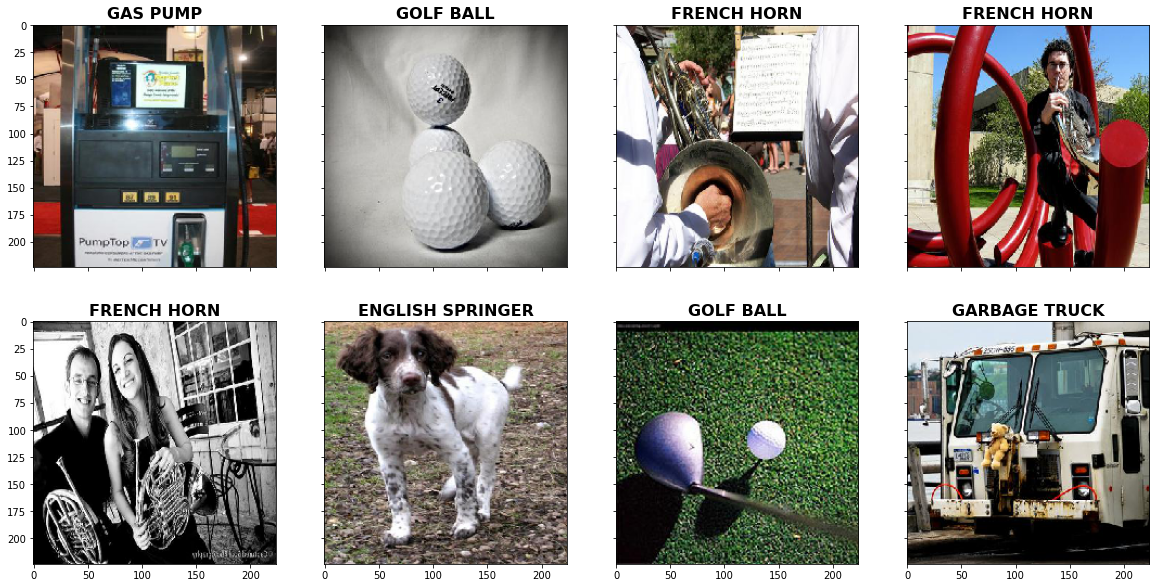

In [4]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
    
)
train_it = train_gen.flow_from_directory(
    f"{SDATASET_PATH}/imagenette2-320/train",
    batch_size=BATCH_SIZE,
    target_size=(WIDTH, HEIGHT),
    color_mode='rgb',
    seed=SEED
)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
    
)
val_it = val_gen.flow_from_directory(
    f"{SDATASET_PATH}/imagenette2-320/val",
    batch_size=BATCH_SIZE,
    target_size=(WIDTH, HEIGHT),
    color_mode='rgb',
    seed=SEED
)

fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
for i in range(2):
    batch_images, batch_classes = next(val_it)
    
    for j, (batch_image, batch_class) in enumerate(zip(batch_images, batch_classes)):
        alias_class = list(val_it.class_indices.keys())[np.argmax(batch_class)]
        class_name = CLS_DICT[alias_class].upper()
        ax[i][j].set_title(class_name, fontdict={'size': 16, 'weight': 'bold'})
        ax[i][j].imshow(batch_image)

#### 2.3. Implementando a DenseNet <a id="densenet_implementation" href="#table_of_content">^</a>
<hr />

A implementação da DenseNet utilizada neste trabalho será feito utilizando o TensorFlow. Será criado uma função base para gerar os modelos baseados em qualquer arquitetura baseada na DenseNet, no entanto, o código fornece suporte para as três versões já existentes (DenseNet-121, DenseNet-169 e DenseNet-201) e a arquitetura proposta no exercício opcional 1 (DenseNet-83). O código abaixo contém as três funções base para a implementação da DenseNet:

In [5]:
# Importing libraries
import numpy as np
import tensorflow as tf


# Create bottleneck layer
def bottleneck_layer(x, growth_rate, name):
    bn_axis = 3
    x1 = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                            name=name+'_0_bn')(x)
    x1 = tf.keras.layers.Activation('relu', name=name+'_0_relu')(x1)
    x1 = tf.keras.layers.Conv2D(4 * growth_rate, 1,
                                use_bias=False,
                                name=name+'_0_conv')(x1)
    x1 = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                            name=name+'_1_bn')(x1)
    x1 = tf.keras.layers.Activation('relu', name=name+'_1_relu')(x1)
    x1 = tf.keras.layers.Conv2D(growth_rate, 3,
                                padding='same',
                                use_bias=False,
                                name=name+'_1_conv')(x1)
    x = tf.keras.layers.Concatenate(axis=bn_axis, name=name+'_concat')([x, x1])
    return x


# Create dense block
def dense_block(x, blocks, name):
    for i in range(blocks):
        x = bottleneck_layer(x, 32, name=name+'_block'+str(i+1))
    return x


# Create transition layer
def transition_layer(x, reduction, name):
    bn_axis = 3
    x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                           name=name+'_bn')(x)
    x = tf.keras.layers.Activation('relu', name=name+'_relu')(x)
    x = tf.keras.layers.Conv2D(int(x.shape[bn_axis] * reduction), 1,
                               use_bias=False,
                               name=name+'_conv')(x)
    x = tf.keras.layers.AveragePooling2D(2, strides=2, name=name+'_pool')(x)
    return x

O código abaixo contém a função para a implementação do modelo baseado na DenseNet. E recebe como entrada o nome da arquitetura que será implementada, as dimensões da imagem de entrada, o número de classes e se a camada de saída vai ser implementada.

In [6]:
# Create DenseNet
def densenet(
    architecture='densenet121', input_shape=(224, 224, 3), n_classes=3, 
    include_top=True
):
    VALID_ARCHITECTURES = {
        'densenet83': (3, 6, 18, 12),
        'densenet121': (6, 12, 24, 16), 
        'densenet169': (6, 12, 32, 32), 
        'densenet201': (6, 12, 48, 32),
    }

    if architecture not in VALID_ARCHITECTURES.keys():
        raise ValueError('Invalid architecture name')

    blocks = VALID_ARCHITECTURES[architecture]

    bn_axis = 3
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(input_layer)
    x = tf.keras.layers.Conv2D(64, 7, strides=2, use_bias=False, name='conv1/conv')(x)
    x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = tf.keras.layers.Activation('relu', name='conv1/relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2, name='pool1')(x)

    x = dense_block(x, blocks[0], name='conv2')
    x = transition_layer(x, 0.5, name='pool2')
    x = dense_block(x, blocks[1], name='conv3')
    x = transition_layer(x, 0.5, name='pool3')
    x = dense_block(x, blocks[2], name='conv4')
    x = transition_layer(x, 0.5, name='pool4')
    x = dense_block(x, blocks[3], name='conv5')

    x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name='bn')(x)
    x = tf.keras.layers.Activation('relu', name='relu')(x)

    if include_top:
        x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = tf.keras.layers.Dense(n_classes, activation='softmax', name='prediction')(x)
    else:
        x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)

    model = tf.keras.models.Model(input_layer, x, name=architecture)

    return model

O código a seguir, contém as funções para gerar cada uma das versões da DenseNet válidas no escopo deste trabalho.

In [7]:
def DenseNet83(): 
    model =  densenet(
        architecture='densenet83', input_shape=(224, 224, 3), 
        n_classes=10, include_top=True
    )
#     print(model.summary())
    return model


def DenseNet121(): 
    model =  densenet(
        architecture='densenet121', input_shape=(224, 224, 3), 
        n_classes=10, include_top=True
    )
#     print(model.summary())
    return model


def DenseNet169(): 
    model =  densenet(
        architecture='densenet169', input_shape=(224, 224, 3), 
        n_classes=10, include_top=True
    )
#     print(model.summary())
    return model


def DenseNet201(): 
    model =  densenet(
        architecture='densenet201', input_shape=(224, 224, 3), 
        n_classes=10, include_top=True
    )
#     print(model.summary())
    return model

O código a seguir possui algumas funções para computar o número de parâmetros do modelo e o total de memória que o modelo consumirá.

In [8]:
# count number of trainable parameters in a model
def count_trainable_params(model):
    return np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])


# Count number of non-trainable parameters in a model
def count_non_trainable_params(model):
    return np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_variables])


# Count total parameters in a model
def count_total_parametes(model):
    train_params = count_trainable_params(model)
    ntrain_params = count_non_trainable_params(model)
    
    return train_params+ntrain_params


# Count total memory usage of a model
def count_total_memory_usage(model, batch_size=4):
    return count_total_parametes(model)*batch_size/1024**2

#### 2.4. Criando e compilando modelos <a id="create_models" href="#table_of_content">^</a>
<hr />

Neste trabalho, serão criados e avaliados dois modelos baseados na DenseNet, conforme proposta no exercício 1, a DenseNet-121 e DenseNet-83. O conjunto de dados em que os modelos serão aplicados, assim como os hiper-parâmetros de compilação dos modelos serão feitos de acordo os propostos no [notebook da aula](https://github.com/vsantjr/DeepLearningMadeEasy/blob/904f86149c59aa58fa06f1d5b3a994e4ccb79b0b/PyTorch_DenseNet.ipynb).

In [9]:
# Creating DenseNet-121
densenet121 = DenseNet121()

# Compiling model
densenet121.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# Printing layer arquiteture summary
densenet121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [10]:
# Creating DenseNet-83
densenet83 = DenseNet83()

# Compiling model
densenet83.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# Printing layer arquiteture summary
densenet83.summary()

Model: "densenet83"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_1[0][0]']       
                                )                                                        

O trecho de código a seguir computa o total de parâmetros e o uso de memória por cada modelo.

In [11]:
train_params_d121 = count_trainable_params(densenet121)
ntrain_params_d121 = count_non_trainable_params(densenet121)
usage_memory_d121 = count_total_memory_usage(densenet121, BATCH_SIZE)

train_params_d83 = count_trainable_params(densenet83)
ntrain_params_d83 = count_non_trainable_params(densenet83)
usage_memory_d83 = count_total_memory_usage(densenet83, BATCH_SIZE)

print("DenseNet-121")
print(f"\tTrainable parameters: {train_params_d121}")
print(f"\tNon-trainable parameters: {ntrain_params_d121}")
print(f"\tTotal parameters: {train_params_d121+ntrain_params_d121}")
print(f"\tMemory usage (in MB): {usage_memory_d121:.3f}")

print("DenseNet-83")
print(f"\tTrainable parameters: {train_params_d83}")
print(f"\tNon-trainable parameters: {ntrain_params_d83}")
print(f"\tTotal parameters: {train_params_d83+ntrain_params_d83}")
print(f"\tMemory usage (in MB): {usage_memory_d83:.3f}")

DenseNet-121
	Trainable parameters: 6964106
	Non-trainable parameters: 83648
	Total parameters: 7047754
	Memory usage (in MB): 26.885
DenseNet-83
	Trainable parameters: 3718538
	Non-trainable parameters: 43832
	Total parameters: 3762370
	Memory usage (in MB): 14.352


#### 2.5. Treinando e salvando DenseNet-121 <a id="training_densenet121" href="#table_of_content">^</a>
<hr />

O modelo será treinado com o número máximo de épocas definido em 100, no entanto, possui uma função auxiliar para interromper o treinamento quando a sua convergência atingir um *plateau* por 15 épocas consecutivas. Além disso, o treinamento também possui uma função para salvar o melhor ajuste de pesos.

In [12]:
ckp_d121 = os.path.join(LOG_PATH, f"DenseNet-121/checkpoints")
if not os.path.exists(ckp_d121): os.makedirs(ckp_d121)

callbacks_d121 = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, 
                                     restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        f"{ckp_d121}/densenet121-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
]
with tf.device('GPU'):
    history_d121 = densenet121.fit(
        train_it, 
        validation_data=val_it,
        # nb_val_samples=len(train_it),
        epochs=EPOCHS,
        steps_per_epoch=len(train_it)//BATCH_SIZE,
        callbacks=callbacks_d121
    )

Epoch 1/100
592/592 [==============================] - 131s 195ms/step - loss: 2.1955 - accuracy: 0.2116 - val_loss: 2.7204 - val_accuracy: 0.2347
Epoch 2/100
592/592 [==============================] - 114s 193ms/step - loss: 1.9712 - accuracy: 0.2998 - val_loss: 2.7360 - val_accuracy: 0.2584
Epoch 3/100
592/592 [==============================] - 112s 190ms/step - loss: 1.8353 - accuracy: 0.3535 - val_loss: 8.1824 - val_accuracy: 0.1300
Epoch 4/100
592/592 [==============================] - 112s 189ms/step - loss: 1.6930 - accuracy: 0.4231 - val_loss: 4.6966 - val_accuracy: 0.2362
Epoch 5/100
592/592 [==============================] - 113s 190ms/step - loss: 1.6275 - accuracy: 0.4595 - val_loss: 3.5414 - val_accuracy: 0.2729
Epoch 6/100
592/592 [==============================] - 112s 190ms/step - loss: 1.5676 - accuracy: 0.4903 - val_loss: 2.3743 - val_accuracy: 0.4220
Epoch 7/100
592/592 [==============================] - 113s 190ms/step - loss: 1.4426 - accuracy: 0.5197 - val_loss: 2

O trecho de código a seguir salva no disco o modelo e seus pesos e também o histórico do treinamento.

In [13]:
densenet121.save(f"{RESULT_PATH}/densenet121.h5")
with open(f"{RESULT_PATH}/history-densenet121.pkl", 'wb') as handle:
    pickle.dump(history_d121.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.6. Treinando e salvando DenseNet-83 <a id="training_densenet83" href="#table_of_content">^</a>
<hr />

Assim como para o modelo baseado na DenseNet-121, o modelo DenseNet-83 também será treinado com o número máximo de épocas definido em 100, tendo a função auxiliar para interromper o treinamento quando a sua convergência atingir um *plateau* por 15 épocas consecutivas. Também possui uma função para criar os *checkpoints* dos melhores ajustes de pesos.

In [14]:
ckp_d83 = os.path.join(LOG_PATH, f"DenseNet-83/checkpoints")
if not os.path.exists(ckp_d83): os.makedirs(ckp_d83)

callbacks_d83 = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, 
                                     restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        f"{ckp_d83}/densenet83-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
]
with tf.device('GPU'):
    history_d83 = densenet83.fit(
        train_it, 
        validation_data=val_it,
        # nb_val_samples=len(train_it),
        epochs=EPOCHS,
        steps_per_epoch=len(train_it)//BATCH_SIZE,
        callbacks=callbacks_d83
    )

Epoch 1/100
592/592 [==============================] - 79s 117ms/step - loss: 2.1109 - accuracy: 0.2416 - val_loss: 3.3612 - val_accuracy: 0.2431
Epoch 2/100
592/592 [==============================] - 69s 116ms/step - loss: 1.9047 - accuracy: 0.3340 - val_loss: 2.7520 - val_accuracy: 0.2920
Epoch 3/100
592/592 [==============================] - 67s 114ms/step - loss: 1.7762 - accuracy: 0.3911 - val_loss: 2.7969 - val_accuracy: 0.3731
Epoch 4/100
592/592 [==============================] - 68s 114ms/step - loss: 1.6628 - accuracy: 0.4409 - val_loss: 5.4132 - val_accuracy: 0.2232
Epoch 5/100
592/592 [==============================] - 68s 114ms/step - loss: 1.5506 - accuracy: 0.4837 - val_loss: 3.9263 - val_accuracy: 0.3058
Epoch 6/100
592/592 [==============================] - 68s 115ms/step - loss: 1.4926 - accuracy: 0.5101 - val_loss: 2.0421 - val_accuracy: 0.4251
Epoch 7/100
592/592 [==============================] - 68s 114ms/step - loss: 1.4525 - accuracy: 0.5283 - val_loss: 2.5398 -

O trecho de código a seguir salva no disco o modelo e seus pesos e também o histórico do treinamento.

In [32]:
densenet83.save(f"{RESULT_PATH}/densenet83.h5")
with open(f"{RESULT_PATH}/history-densenet83.pkl", 'wb') as handle:
    pickle.dump(history_d83.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.7. Comparação e avaliação dos modelos <a id="evaluate_models" href="#table_of_content">^</a>
<hr />

O trecho abaixo cria os gráficos para comparar o erro e acurácia a partir do histórico do treinamento e validação dos dois modelos.


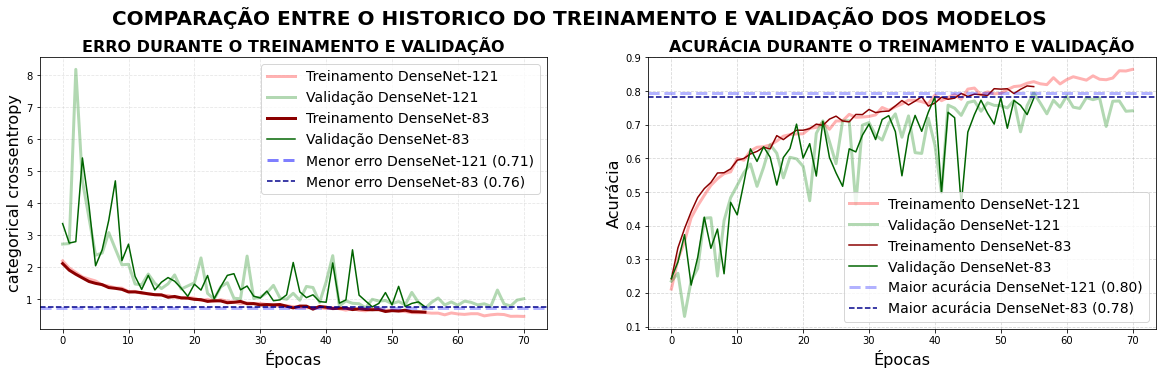

In [3]:
with open(f"{RESULT_PATH}/history-densenet121.pkl", 'rb') as handle:
    lhistory_d121 = pickle.load(handle)

with open(f"{RESULT_PATH}/history-densenet83.pkl", 'rb') as handle:
    lhistory_d83 = pickle.load(handle)


fig, ax = plt.subplots(1, 2, figsize=(20, 5))

fig.suptitle("COMPARAÇÃO ENTRE O HISTORICO DO TREINAMENTO E VALIDAÇÃO DOS MODELOS", fontsize=20, fontweight='bold', y=1.02)
ax[0].set_title("ERRO DURANTE O TREINAMENTO E VALIDAÇÃO", fontdict={'size': 16, 'weight': 'bold'})
ax[0].set_ylabel('categorical crossentropy', fontdict={'size': 16})
ax[0].grid(ls='--', alpha=0.3)
ax[0].set_xlabel('Épocas', fontdict={'size': 16})
ax[0].plot(lhistory_d121['loss'], c='r', label='Treinamento DenseNet-121', alpha=0.3, lw=3)
ax[0].plot(lhistory_d121['val_loss'], c='g', label='Validação DenseNet-121', alpha=0.3, lw=3)

ax[0].plot(lhistory_d83['loss'], c='darkred', ls='-', label='Treinamento DenseNet-83', lw=3)
ax[0].plot(lhistory_d83['val_loss'], c='darkgreen', ls='-', label='Validação DenseNet-83')

min_loss = min(lhistory_d121['val_loss'])
ax[0].axhline(y=min_loss, ls='--', c='blue', lw=3, alpha=0.3)
ax[0].plot(
    [], c='blue', ls='--', lw=3, 
    label=f"Menor erro DenseNet-121 ({min_loss:.2f})", alpha=0.5
)

min_loss = min(lhistory_d83['val_loss'])
ax[0].axhline(y=min_loss, ls='--', c='darkblue', lw=1.5)
ax[0].plot(
    [], ls='--', c='darkblue', lw=1.5, 
    label=f"Menor erro DenseNet-83 ({min_loss:.2f})"
)


ax[1].set_title("ACURÁCIA DURANTE O TREINAMENTO E VALIDAÇÃO", fontdict={'size': 16, 'weight': 'bold'})
ax[1].set_ylabel('Acurácia', fontdict={'size': 16})
ax[1].set_xlabel('Épocas', fontdict={'size': 16})
ax[1].grid(ls='--', alpha=0.5)
ax[1].plot(lhistory_d121['accuracy'], c='r', label='Treinamento DenseNet-121', alpha=0.3, lw=3)
ax[1].plot(lhistory_d121['val_accuracy'], c='g', label='Validação DenseNet-121', alpha=0.3, lw=3)
ax[1].plot(lhistory_d83['accuracy'], c='darkred', label='Treinamento DenseNet-83')
ax[1].plot(lhistory_d83['val_accuracy'], c='darkgreen', label='Validação DenseNet-83')

max_acc = max(lhistory_d121['val_accuracy'])
ax[1].axhline(y=max_acc, ls='--', c='blue', alpha=0.3, lw=3)
ax[1].plot(
    [], ls='--', c='blue', alpha=0.3, lw=3, 
    label=f"Maior acurácia DenseNet-121 ({max_acc:.2f})"
)

max_acc = max(lhistory_d83['val_accuracy'])
ax[1].axhline(y=max_acc, ls='--', c='darkblue', lw=1.5)
ax[1].plot(
    [], ls='--', c='darkblue', lw=1.5, 
    label=f"Maior acurácia DenseNet-83 ({max_acc:.2f})"
)

ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='lower right', fontsize=14)

plt.savefig(
    f"{RESULT_PATH}/train_comp-history.png", transparent=False,
    bbox_inches='tight', pad_inches=0.1
)

In [12]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_it = test_gen.flow_from_directory(
    f"{SDATASET_PATH}/imagenette2-320/test",
    batch_size=BATCH_SIZE,
    target_size=(WIDTH, HEIGHT),
    color_mode='rgb',
    seed=SEED
)
true = test_it.classes
n_samples = len(true)

Found 2617 images belonging to 10 classes.


In [ ]:
# X_test, y_test = [], []

# test_path = f"{SDATASET_PATH}/imagenette2-320/test"
# classes = sorted(os.listdir(test_path))

# for i, cls in enumerate(classes):
#     folder = os.path.join(test_path, cls)
#     for file in os.listdir(folder):
#         with pimage.open(f"{folder}/{file}", 'r') as handle:
#             X_test.append(
#                 tf.keras.preprocessing.image.img_to_array(handle)/255.
#             )
#         X_test.append(i)
# X_test = np.array(X_test)
# y_test = tf.keras.utils.to_categorical(np.array(y_test))
# X_test.shape, y_test.shape

In [6]:
ldensenet121 = tf.keras.models.load_model(f"{RESULT_PATH}/densenet121.h5")
ldensenet83 = tf.keras.models.load_model(f"{RESULT_PATH}/densenet83.h5")

In [19]:
loss_d121, acc_d121 = ldensenet121.evaluate(test_it, batch_size=BATCH_SIZE)

print("DenseNet-121")
print(f"\tAccuracy: {acc_d121}")
print(f"\tLoss: {loss_d121}")

655/655 [==============================] - 357s 546ms/step - loss: 0.7772 - accuracy: 0.7784
DenseNet-121
	Accuracy: 0.7783721685409546
	Loss: 0.7771919369697571


In [20]:
loss_d83, acc_d83 = ldensenet83.evaluate(test_it, batch_size=BATCH_SIZE)

print("DenseNet-83")
print(f"\tAccuracy: {acc_d83}")
print(f"\tLoss: {loss_d83}")

655/655 [==============================] - 188s 284ms/step - loss: 0.9064 - accuracy: 0.7574
DenseNet-83
	Accuracy: 0.7573557496070862
	Loss: 0.9063534736633301


| MODELO      | P. TREINÁVEIS | P. NÃO-TREINÁVEIS | TOTAL PARÂMETROS | USO DE MEMÓRIA | TEMPO DE EXECUÇÃO | ACURÁCIA |
| :----: | :----: | :----: | :----: | :----: | :----: | :----: |
| DenseNet-121 | 6964106 | 83648 | 7047754 | 26,885 MB | 8941 s | 77,837% |
| DenseNet-83 | 3718538 | 43832 | 3762370 | 14,352 MB | 4236 s | 75,735% |

### 3. Referências <a id="references" href="#table_of_content">^</a>
<hr />

<li id="huang_densely_2017">
Huang, G., Liu, Z., Van Der Maaten, L. and Weinberger, K.Q., 2017. Densely connected convolutional networks. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4700-4708).
</li>

<li id="he_deep_2016">
He, K., Zhang, X., Ren, S. and Sun, J., 2016. Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).
</li>

<li id="santiagojr_2021">
V. A. Santiago Júnior. Deep Leaning Made Easy, 2021. Acessed on: 11-12-2021. Available: https://github.com/vsantjr/DeepLearningMadeEasy.
</li>